In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from PIL import Image
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from wordcloud import WordCloud
import string

from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width',200)

In [9]:
df = pd.read_csv("/content/wiki_data.csv", index_col = 0)
df

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...
...,...
10855,Soundcast\n\nSoundcast LLC is a privately fund...
10856,Spectrum analyzer\n\nA spectrum analyzer measu...
10857,Telepresence technology\n\nTelepresence techno...
10858,Trans-Pacific Profiler Network\n\nThe Trans-Pa...


## Text Preprocessing

In [3]:
def clean_text(text):
    # Normalizing Case Folding
    text = text.str.lower()
    # Punctuations
    text = text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    # If you don't replace \n with space, it'll raise an error
    text = text.str.replace("\n" , ' ')
    # Numbers
    text = text.fillna('').apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

    return text

# Apply the clean_text function to the "text" column
df["text"] = clean_text(df["text"])

# Now "text" column should contain cleaned text
df

,text
1,anovo anovo formerly a novo is a computer ser...
2,battery indicator a battery indicator also kn...
3,bob pease robert allen pease august â â€“ ju...
4,cavnet cavnet was a secure military forum whi...
5,clidar the clidar is a scientific instrument ...
...,...
10855,soundcast soundcast llc is a privately funded...
10856,spectrum analyzer a spectrum analyzer measure...
10857,telepresence technology telepresence technolo...
10858,transpacific profiler network the transpacifi...


In [ ]:
# Second way
""""def clean_text(text):
    if isinstance(text, list):
        #text = ' '.join(text)
    # Normalizing Case Folding
    text = text.lower()

    # Punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Numbers
    text = ''.join([i for i in text if not i.isdigit()])

    # Stopwords
    sw = stopwords.words('english')
    text = ' '.join([word for word in text.split() if word not in sw])

    return text

# Apply the clean_text function to the "text" column
df["text"] = df["text"].apply(clean_text)

# Now "text" column should contain cleaned text
print(df["text"])"""


In [4]:
# Stopwords

def remove_stopwords(text):
    sw = stopwords.words('english')
    text = text.apply(lambda x: ' '.join(x for x in str(x).split() if x not in sw))
    return text

df["text"] = remove_stopwords(df["text"])
df["text"]

1        anovo anovo formerly novo computer services co...
2        battery indicator battery indicator also known...
3        bob pease robert allen pease august â â€“ june...
4        cavnet cavnet secure military forum became ope...
5        clidar clidar scientific instrument used measu...
                               ...                        
10855    soundcast soundcast llc privately funded compa...
10856    spectrum analyzer spectrum analyzer measures m...
10857    telepresence technology telepresence technolog...
10858    transpacific profiler network transpacific pro...
10859    transfer case transfer case part drivetrain fo...
Name: text, Length: 10859, dtype: object

In [5]:
# Rarewords
delete = pd.Series(' '.join(df["text"]).split()).value_counts()[-150000:]
delete

kilobytes             9
episodic              9
chioggia              9
doorway               9
kaypro                9
                     ..
upstreamdownstream    1
expirable             1
phas                  1
mspm                  1
dashmounted           1
Length: 150000, dtype: int64

In [6]:
df["text"] = df["text"].apply(lambda x: ' '.join(x for x in x.split() if x not in delete))
df["text"]

1        formerly novo computer services company based ...
2        battery indicator battery indicator also known...
3        bob pease robert allen pease august â â€“ june...
4        secure military forum became operational april...
5        scientific instrument used measuring particula...
                               ...                        
10855    soundcast soundcast llc privately funded compa...
10856    spectrum analyzer spectrum analyzer measures m...
10857    telepresence technology telepresence technolog...
10858    profiler network profiler network usually abbr...
10859    transfer case transfer case part drivetrain fo...
Name: text, Length: 10859, dtype: object

In [7]:
# Tokenization
df["text"] = df["text"].apply(lambda x: TextBlob(x).words)
df["text"]

1        [formerly, novo, computer, services, company, ...
2        [battery, indicator, battery, indicator, also,...
3        [bob, pease, robert, allen, pease, august, â, ...
4        [secure, military, forum, became, operational,...
5        [scientific, instrument, used, measuring, part...
                               ...                        
10855    [soundcast, soundcast, llc, privately, funded,...
10856    [spectrum, analyzer, spectrum, analyzer, measu...
10857    [telepresence, technology, telepresence, techn...
10858    [profiler, network, profiler, network, usually...
10859    [transfer, case, transfer, case, part, drivetr...
Name: text, Length: 10859, dtype: object

In [8]:
# Lemmatization

#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    if isinstance(text, str):  # Check if the input is a string
        tokens = nltk.word_tokenize(text)  # Tokenize the text
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize each token
        return ' '.join(lemmatized_tokens)  # Join the lemmatized tokens back into a string
    else:
        return text

df['text'] = df['text'].apply(lemmatize_text)
df['text']

1        [formerly, novo, computer, services, company, ...
2        [battery, indicator, battery, indicator, also,...
3        [bob, pease, robert, allen, pease, august, â, ...
4        [secure, military, forum, became, operational,...
5        [scientific, instrument, used, measuring, part...
                               ...                        
10855    [soundcast, soundcast, llc, privately, funded,...
10856    [spectrum, analyzer, spectrum, analyzer, measu...
10857    [telepresence, technology, telepresence, techn...
10858    [profiler, network, profiler, network, usually...
10859    [transfer, case, transfer, case, part, drivetr...
Name: text, Length: 10859, dtype: object

## Text Visualization

In [ ]:
# Counting term frequency

tf = df["text"].apply(lambda x: pd.value_counts(str(x).split())).sum(axis = 0).reset_index()
tf.columns = ["word","tf"]
tf = tf.sort_values(by = "tf", ascending = False)
tf

In [ ]:
tf[tf["tf"] > 10000].plot.barh(x = "word", y = "tf")

In [ ]:
text = " ".join(str(i) for i in df.text)
wordcloud = WordCloud(max_font_size = 50,
                     max_words = 50,
                     background_color = "white").generate(text)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

## One Function for All Stages and Docstring

In [10]:
from textblob import TextBlob
from textblob import Word
import pandas as pd
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def preprocessing(text, barplot=False, wordcloud=False):
    """
    This function provides the preprocessing of text and visualizing the text.

    - param text: The variable containing the texts in the DataFrame
    - param barplot: Barplot visualization
    - param wordcloud: Wordcloud visualization
    - return text

    Example:  df["column"] = preprocessing(df["column"])

    """
    # Normalizing Case Folding
    text = text.str.lower()

    # Punctuations
    text = text.apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))
    # If you don't replace \n with space, it'll raise an error
    text = text.replace("\n", " ")

    # Numbers
    text = text.apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

    # Stopwords
    sw = stopwords.words('english')
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in sw))

    # Rarewords
    delete = pd.Series(" ".join(" ".join(text).split())).value_counts()[-150000:]
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in delete))

    # Tokenization
    text = text.apply(lambda x: TextBlob(x).words)

    # Lemmatization
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

    if barplot:
        # Counting Term Frequency
        tf = pd.Series(" ".join(" ".join(text).split()).split()).value_counts().reset_index()

        # Naming columns
        tf.columns = ["word","tf"]

        # Sorting Through Term Frequency
        tf = tf.sort_values(by="tf", ascending=False, ignore_index=True)

        # Visualizing with Barplot
        tf[tf["tf"] > 10000].plot.barh(x="word", y="tf")
        plt.show()

    if wordcloud:
        # Merging Words
        text = " ".join(" ".join(text).split())

        # Arranging Wordcloud Parameters
        wc = WordCloud(max_words=100,
                       max_font_size=100,
                       background_color="white",
                      ).generate(text)
        plt.figure(figsize=[10,10])
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.show()

    return text


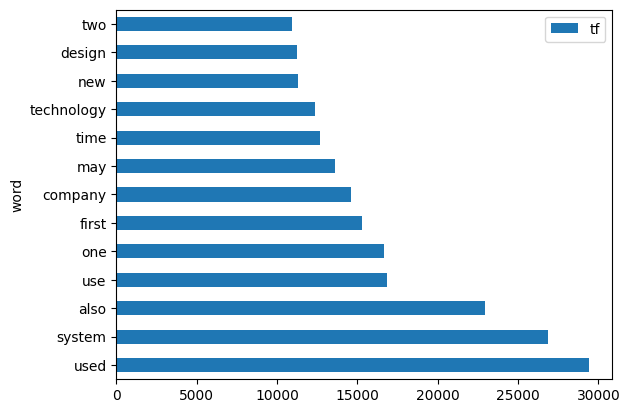

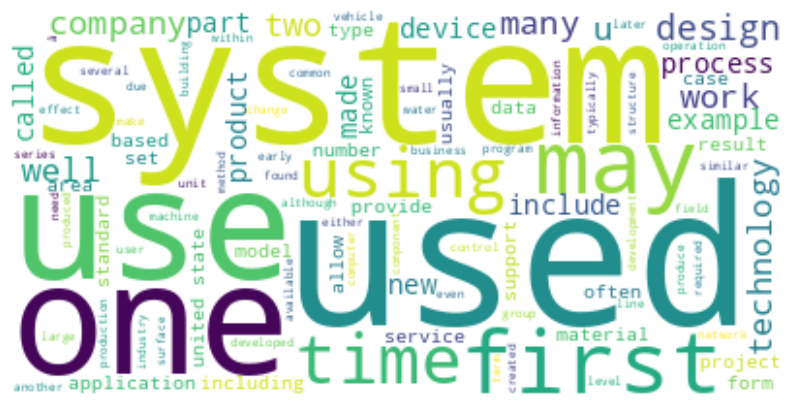

In [11]:
preprocessing(df["text"], True, True)

In [ ]:
nltk.download("all")